# <center><font color= blue>Homework 01 - Due Feb 14 </font></center>
## <font color= blue>CPSC8430 - Deep Learning </font>
##  <font color= blue>Sadegh Sadeghi Tabas</font> 
###  <font color= red>Implementation of CNN for MNIST dataset</font> 
***

#### <font color= green> import required libraries

In [1]:
%tensorflow_version 1.x

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 1.x selected.
Found GPU at: /device:GPU:0


#### <font color= green> Please check out the libraries veirsion that are compatible with this code

In [2]:
print("trnsorflow version=",tf.__version__)
print("numpy version=",np.__version__)

trnsorflow version= 1.15.2
numpy version= 1.19.5


####  <font color= green> Here we are going to set random seed to have reproducible results

In [3]:
tf.set_random_seed(1)
np.random.seed(1)

####  <font color= green> Data prepration: Check if the MNIST dataset is correctly loaded

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
-----------------------------------------------------
Train-set size:		55000
Validation-set size:	5000
Test-set size:		10000
-----------------------------------------------------
Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Number in the image = 9


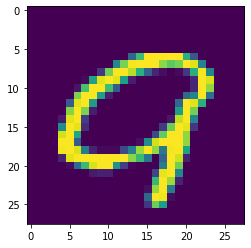

-----------------------------------------------------
Label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
Number in the image = 9


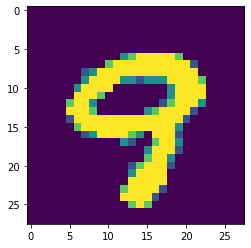

-----------------------------------------------------
Label: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Number in the image = 7


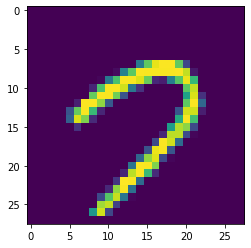

In [4]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
data = mnist.train.next_batch(3)
images = data[0]
labels = data[1]
print("-----------------------------------------------------")
print("Train-set size:\t\t{}".format(len(mnist.train.labels)))
print("Validation-set size:\t{}".format(len(mnist.validation.labels)))
print("Test-set size:\t\t{}".format(len(mnist.test.labels)))
for index, image in enumerate(images):
    print("-----------------------------------------------------")
    print( 'Label:', labels[index])
    print( 'Number in the image =', np.argmax(labels[index]))
    plt.imshow(image.reshape(28,28))
    plt.show()

#### <font color= green> Now we are going to create __Place Holders__ for input and output (input with 28x28 pixels = 784; output with 10 digits)

In [5]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y = tf.placeholder(tf.float32, shape=[None, 10])
input_tensor = tf.reshape(x, [-1,28,28,1]) # Reshaping to be compatible with tensorflow pooling functions
y_true_cls = tf.argmax(y, dimension=1)
keep_prob = tf.placeholder(tf.float32)

Instructions for updating:
Use the `axis` argument instead


#### <font color= green> Function to create convolution layer

In [6]:
def ConvLayer(input_tensor, numInputChannels, numFilters, kernel, stride, name):

    # define the input shape filter for tf.nn.conv2d 
    convFilterShape = [kernel[0], kernel[1], numInputChannels, numFilters]

    # define the weights
    weight = tf.get_variable(initializer=tf.random_normal(convFilterShape, stddev=0.0999), name=name+'/weight')
    
    # define the bias
    bias = tf.get_variable(shape=[numFilters],initializer=tf.constant_initializer(0.1), name=name+'/bias')

    # convolution layer setup
    con = tf.nn.conv2d(input_tensor, weight, strides=[1, 1, 1, 1], padding='SAME')
    
    # define ReLU activation operation
    activation = tf.nn.relu(tf.nn.bias_add(con, bias))

    # performing max pooling on activation
    activation = tf.nn.max_pool(value=activation,
                                ksize=[1, 2, 2, 1],
                                strides=[1, 2, 2, 1],
                                padding='SAME')
    
    return activation

#### <font color= green> Function for flattening (producing 1D array)

In [7]:
def flatten(x):    
    
    input_shape=x.get_shape()
    flatNum = 1
    for index in range(len(input_shape)-1):
        flatNum *= input_shape[1-len(input_shape)+index].value
    x = tf.reshape(x, [-1,flatNum])

    print('flatten: {}'.format(x.get_shape()))
    
    return x

#### <font color= green> Function to create fully connected layer

In [8]:
def fcLayer(x, num_output, activationFun=None, name=None):

    # define the weights
    weight = tf.get_variable(initializer=tf.random_normal([x.get_shape()[-1].value, num_output], stddev=0.0999), name=name+'/weight')

    # define the bias
    bias = tf.get_variable(shape=[num_output],initializer=tf.constant_initializer(0.1), name=name+'/bias')
    
    # calc sum of neurons
    sum = tf.matmul(x,weight) + bias
        
    # apply activation function if required
    if activationFun:
        sum = activationFun(sum)

    return sum

#### <font color= green> Define the Network

In [9]:
convLayer1 = ConvLayer(input_tensor, 1, 36, [5, 5], [2, 2], name='convLayer1')
convLayer2 = ConvLayer(convLayer1, 36, 36, [5,5], [2,2],name='convLayer2')
convLayer3 = ConvLayer(convLayer2, 36, 36, [5,5], [2,2],name='convLayer3')
dropout1 = tf.nn.dropout(convLayer3, 0.75)
flatten_out = flatten(dropout1)
denseLayer1 = fcLayer(flatten_out, 576, tf.nn.relu, name='denseLayer1')
dropout2 = tf.nn.dropout(denseLayer1, 0.75)
out = fcLayer(dropout2, 10, name='denseLayer2')
y_pred = tf.nn.softmax(logits=out)
y_pred_cls = tf.argmax(y_pred, dimension=1)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
flatten: (?, 576)


#### <font color= green> Counting Number of Parameters

In [10]:
params_num = 0
for var in tf.trainable_variables():
    shape = var.get_shape()
    varParamsNum = 1
    for dim in shape:
        varParamsNum *= dim.value
    print(varParamsNum)
    params_num += varParamsNum
print(params_num)

900
36
32400
36
32400
36
331776
576
5760
10
403930


#### <font color= green>  Define loss 

In [11]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y, logits=out)
loss = tf.reduce_mean(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



#### <font color= green> Define optimizer

In [12]:
opt = tf.train.AdamOptimizer(learning_rate=0.0001)
optimizer = opt.minimize(loss)

#### <font color= green> Defining accuracy

In [13]:
correct_pred = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

#### <font color= green> Function for getting weights from the network

In [14]:
def getWeights(layer_name):
    with tf.variable_scope(layer_name, reuse=True):
        variable = tf.get_variable('weight')
    return variable

#### <font color= green> Getting the weights

In [15]:
weights_conv1 = getWeights(layer_name='convLayer1')
weights_conv2 = getWeights(layer_name='convLayer2')
weights_denseLayer1 = getWeights(layer_name='denseLayer1')
weights_out = getWeights(layer_name='denseLayer2')

#### <font color= green>Creating a Tensorflow session

In [16]:
sess = tf.Session()

#### <font color= green>Initializing the variables

In [17]:
sess.run(tf.global_variables_initializer())

#### <font color= green> Training the network

In [18]:
max_epochs=8
batch_size = 64
total_batch_size = int(len(mnist.train.labels) / batch_size)
grad_arr, iteration_arr, train_loss_arr, train_accuracy_arr = [], [], [], []
global iteration_ctr
iteration_ctr = 0

for epoch in range(max_epochs):

    print('epoch: {}/{}'.format(epoch+1,max_epochs))

    for batch_ctr in range(total_batch_size):

        # Fetching a batch size of 64 images
        x_batch, y_true_batch = mnist.train.next_batch(batch_size)

        feed_dict_train = {x: x_batch, y: y_true_batch}

        # run training for each iteration
        sess.run(optimizer, feed_dict={x: x_batch, y: y_true_batch, keep_prob: 0.5})

        # Every 10 steps, compute the loss and accuracy of training
        if batch_ctr % 10 == 0:
            train_loss, train_accuracy = sess.run([loss, accuracy], feed_dict=feed_dict_train)
            train_accuracy_arr.append(train_accuracy)
            train_loss_arr.append(train_loss)
            iteration_ctr +=1
            iteration_arr.append(iteration_ctr)
      
            # Every 100 steps, print the loss and accuracy of training
            if batch_ctr % 100 == 0:
                print('Iteration {:>6}   Training Loss {:>1.4}  Training Accuracy {:>6.1%}'.format(batch_ctr+1, train_loss, train_accuracy))

print('Iteration {:>6} Training Loss {:>1.6} Training Accuracy {:>6.1%}'.format(batch_ctr+1, train_loss, train_accuracy))


epoch: 1/8
Iteration      1   Training Loss 8.903  Training Accuracy  20.3%
Iteration    101   Training Loss 1.978  Training Accuracy  31.2%
Iteration    201   Training Loss 0.9487  Training Accuracy  68.8%
Iteration    301   Training Loss 0.7444  Training Accuracy  78.1%
Iteration    401   Training Loss 0.7245  Training Accuracy  73.4%
Iteration    501   Training Loss 0.4258  Training Accuracy  84.4%
Iteration    601   Training Loss 0.4489  Training Accuracy  85.9%
Iteration    701   Training Loss 0.3229  Training Accuracy  85.9%
Iteration    801   Training Loss 0.2867  Training Accuracy  92.2%
epoch: 2/8
Iteration      1   Training Loss 0.2473  Training Accuracy  95.3%
Iteration    101   Training Loss 0.4522  Training Accuracy  87.5%
Iteration    201   Training Loss 0.1688  Training Accuracy  96.9%
Iteration    301   Training Loss 0.2235  Training Accuracy  95.3%
Iteration    401   Training Loss 0.1924  Training Accuracy  92.2%
Iteration    501   Training Loss 0.2394  Training Accura

#### <font color= green>Plotting graphs

#### <font color= green>Training loss vs Iteration

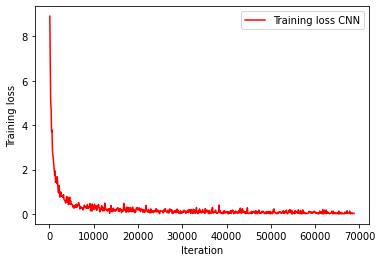

In [22]:
iteration_arr = np.array(iteration_arr)
iteration_arr = iteration_arr * 10

plt.plot(iteration_arr, train_loss_arr, 'r', label = "Training loss CNN")
plt.xlabel('Iteration')
plt.ylabel('Training loss')
plt.legend()
plt.show()

#### <font color= green>Training loss and accuracy vs Iterations

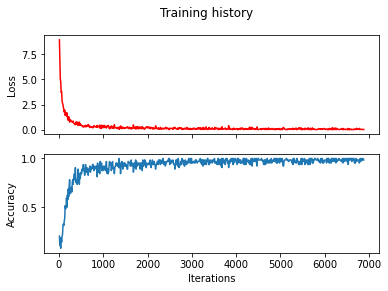

In [20]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.suptitle('Training history')
ax1.plot(iteration_arr, train_loss_arr, 'r')
ax2.plot(iteration_arr, train_accuracy_arr)
plt.xlabel('Iterations')
ax1.set_ylabel('Loss')
ax2.set_ylabel('Accuracy')
plt.show()

#### <font color= green>Testing accuracy on test data

In [21]:
mnist.test.cls = np.argmax(mnist.test.labels, axis=1)
test_batch_size = 256
numTestSamples = len(mnist.test.images)
y_pred = np.zeros(shape=numTestSamples, dtype=np.int) # place holder for classes

i = 0
while i < numTestSamples:
    j = min(i + test_batch_size, numTestSamples) # denotes the ending index for the next batch

    # Get the images between index i and j
    img = mnist.test.images[i:j, :]

    # Get the associated labels
    labels = mnist.test.labels[i:j, :]

    # Create feed-dict
    feed_dict = {x: img, y: labels}

    # predict classes
    y_pred[i:j] = sess.run(y_pred_cls, feed_dict=feed_dict)
    i = j

# calc accuracy
y_true = mnist.test.cls
correct = (y_true == y_pred)
numCorrect = correct.sum()
acc = float(numCorrect) / numTestSamples
print("Accuracy on Test-Set: {0:.2%} ({1} / {2})".format(acc, numCorrect, numTestSamples))


Accuracy on Test-Set: 98.23% (9823 / 10000)
